In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts
import requests
import time
from scipy.stats import linregress
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd



In [2]:
# File to Load (Remember to Change These)
Kansas_race_file = "Distribution_of_COVID-19_deaths_and_populations__by_jurisdiction__age__and_race_and_Hispanic_origin.csv"
Kansas_county_file = "covid_confirmed_usafacts (1).csv"
# Read Purchasing File and store into Pandas data frame
Kansas_county_cases = pd.read_csv(Kansas_county_file)
Kansas_race_cases = pd.read_csv(Kansas_race_file)
# Read Purchasing File and store into Pandas data frame

df= pd.read_csv(Kansas_county_file)

In [16]:
df

,countyFIPS,County Name,State,3/2/2021
0,20001,Allen County,KS,1127
1,20003,Anderson County,KS,813
2,20005,Atchison County,KS,1531
3,20007,Barber County,KS,365
4,20009,Barton County,KS,2572
...,...,...,...,...
100,20201,Washington County,KS,526
101,20203,Wichita County,KS,215
102,20205,Wilson County,KS,946
103,20207,Woodson County,KS,204


In [4]:
df.nunique()

countyFIPS     105
County Name    105
State            1
3/2/2021       103
dtype: int64

In [5]:
county_df=df.dropna(how="any")
county_df.head()

,countyFIPS,County Name,State,3/2/2021
0,20001,Allen County,KS,1127
1,20003,Anderson County,KS,813
2,20005,Atchison County,KS,1531
3,20007,Barber County,KS,365
4,20009,Barton County,KS,2572


In [6]:
county_df.nunique()

countyFIPS     105
County Name    105
State            1
3/2/2021       103
dtype: int64

In [28]:
county_df["3/2/2021"].value_counts()
pd.set_option('display.max_rows', None)
county_df

,countyFIPS,County Name,State,3/2/2021
0,20001,Allen County,KS,1127
1,20003,Anderson County,KS,813
2,20005,Atchison County,KS,1531
3,20007,Barber County,KS,365
4,20009,Barton County,KS,2572
5,20011,Bourbon County,KS,1280
6,20013,Brown County,KS,1212
7,20015,Butler County,KS,7205
8,20017,Chase County,KS,243
9,20019,Chautauqua County,KS,258


In [36]:
Total_Cases=county_df.sort_values("3/2/2021",ascending=False )
pd.set_option('display.max_rows', None)
Total_Cases["County Name"].array

<PandasArray>
[    'Johnson County ',    'Sedgwick County ',   'Wyandotte County ',
     'Shawnee County ',     'Douglas County ',        'Reno County ',
      'Butler County ', 'Leavenworth County ',       'Riley County ',
      'Saline County ',
 ...
     'Woodson County ',    'Hodgeman County ',    'Hamilton County ',
      'Jewell County ',     'Stanton County ',         'Elk County ',
     'Wallace County ',    'Comanche County ',        'Lane County ',
     'Greeley County ']
Length: 105, dtype: object

In [35]:
Total_Cases["3/2/2021"].array
pd.set_option('display.max_rows', None)
Total_Cases["3/2/2021"]

45     54370
86     53679
104    19219
88     16362
22      8533
77      8299
7       7205
51      6783
80      6148
84      5963
27      5961
28      5577
18      4514
55      4099
87      3859
17      3805
25      3681
39      3403
62      3285
56      3108
30      3025
60      2637
49      2608
4       2572
29      2438
10      2359
95      2070
74      1755
66      1740
20      1685
43      1618
2       1531
65      1474
42      1330
5       1280
68      1214
6       1212
26      1208
69      1189
72      1133
0       1127
96      1094
58      1070
79      1054
57      1024
14       967
33       964
102      946
21       942
83       842
1        813
13       806
75       802
53       749
47       727
15       712
73       704
78       676
98       662
81       634
90       625
34       600
38       599
63       573
85       569
61       565
46       560
36       557
71       548
94       546
100      526
59       493
89       426
82       425
40       407
97       400
31       376

In [38]:
county=['Allen County', 'Anderson County', 'Atchison County', 'Barber County', 'Barton County', 'Bourbon County', 'Brown County', 'Butler County', 'Chase County', 'Chautauqua County', 'Cherokee County', 'Cheyenne County', 'Clark County ', 'Clay County', 'Cloud County', 'Coffey County', 'Comanche County', 'Cowley County', 'Crawford County', 'Decatur County', 'Dickinson County', 'Doniphan County', 'Douglas County', 'Edwards County', 'Elk County', 'Ellis County', 'Ellsworth County', 'Finney County', 'Ford County', 'Franklin County', 'Geary County', 'Gove County', 'Graham County', 'Grant County', 'Gray County', 'Greeley County', 'Greenwood County', 'Hamilton County', 'Harper County', 'Harvey County', 'Haskell County', 'Hodgeman County', 'Jackson County', 'Jefferson County', 'Jewell County', 'Johnson County', 'Kearny County', 'Kingman County', 'Kiowa County', 'Labette County', 'Lane County', 'Leavenworth County', 'Lincoln County', 'Linn County', 'Logan County', 'Lyon County', 'McPherson County', 'Marion County', 'Marshall County', 'Meade County', 'Miami County', 'Mitchell County', 'Montgomery County', 'Morris County', 'Morton County', 'Nemaha County', 'Neosho County', 'Ness County', 'Norton County', 'Osage County', 'Osborne County', 'Ottawa County', 'Pawnee County', 'Phillips County', 'Pottawatomie County', 'Pratt County', 'Rawlins County', 'Reno County', 'Republic County', 'Rice County', 'Riley County', 'Rooks County', 'Rush County', 'Russell County', 'Saline County', 'Scott County', 'Sedgwick County', 'Seward County', 'Shawnee County', 'Sheridan County', 'Sherman County', 'Smith County', 'Stafford County', 'Stanton County', 'Stevens County', 'Sumner County', 'Thomas County', 'Trego County', 'Wabaunsee County', 'Wallace County ', 'Washington County', 'Wichita County', 'Wilson County', 'Woodson County', 'Wyandotte County']

Cases=['1127', '813', '1531', '365', '2572', '1280', '1212', '7205', '243', '258', '2359', '353', '242', '806', '967', '712', '158', '3805', '4514', '259', '1685', '942', '8533', '254', '175', '3681', '1208', '5961', '5577', '2438', '3025', '376', '249', '964', '600', '102', '557', '201', '599', '3403', '407', '203', '1330', '1618', '199', '54370', '560', '727', '266', '2608', '124', '6783', '254', '749', '292', '4099', '3108', '1024', '1070', '493', '2637', '565', '3285', '573', '254', '1474', '1740', '364', '1214', '1189', '297', '548', '1133', '704', '1755', '802', '346', '8299', '676', '1054', '6148', '634', '425', '842', '5963', '569', '53679', '3859', '16362', '426', '625', '264', '335', '184', '546', '2070', '1094', '400', '662', '173', '526', '215', '946', '204', '19219']


Final_df=pd.DataFrame({"County":county,
                       "Cases":Cases})

Final_df.head()

,County,Cases
0,Allen County,1127
1,Anderson County,813
2,Atchison County,1531
3,Barber County,365
4,Barton County,2572


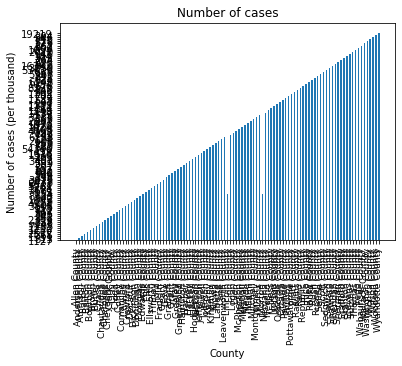

In [39]:
Counties = Final_df["County"]
Cases_load = Final_df["Cases"]
plt.title("Number of cases")
plt.ylabel("Number of cases (per thousand)")
plt.xlabel("County")
width = 0.5 
plt.xticks(rotation=90)
plt.bar(Counties, Cases_load, width)
plt.tick_params(axis="x", which="major", labelsize=9)

plt.show()

Text(0.5, 1.0, 'Percentage of cases per county')

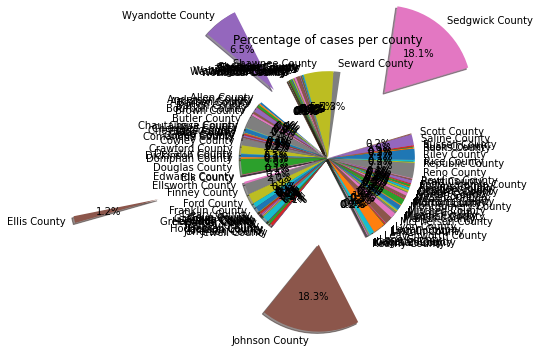

In [52]:
#Pie chart of the percentage(%)
sizes=Final_df["Cases"]

labels=Final_df["County"].unique()

explode= (0,0,0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	2,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1)

plt.pie(sizes, labels=labels,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of cases per county")